In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#Voy a leer la información para poder trabajar con la misma.
hechos = pd.read_csv('hechos.csv')
#Me fijo primeros valores para evaluar que me trae la base de datos
hechos.head(3)

,ID,N_VICTIMAS,FECHA,AAAA,MM,DD,HORA,HH,LUGAR_DEL_HECHO,TIPO_DE_CALLE,...,Altura,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,1,1/1/2016,2016,1,1,4:00:00,4,AV PIEDRA BUENA Y AV FERNANDEZ DE LA CRUZ,AVENIDA,...,NaN,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,1/2/2016,2016,1,2,1:15:00,1,AV GRAL PAZ Y AV DE LOS CORRALES,GRAL PAZ,...,NaN,DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,1/3/2016,2016,1,3,7:00:00,7,AV ENTRE RIOS 2034,AVENIDA,...,2034.0,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO


In [5]:
import pandas as pd
#Voy a leer la información para poder trabajar con la misma.
victimas= pd.read_csv('victimas.csv')
#Me fijo primeros valores para evaluar que me trae la base de datos
victimas.head(5)

,ID_hecho,FECHA,AAAA,MM,DD,ROL,VICTIMA,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,1/1/2016,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19,1/1/2016
1,2016-0002,1/2/2016,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70,1/2/2016
2,2016-0003,1/3/2016,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30,1/3/2016
3,2016-0004,1/10/2016,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18,SD
4,2016-0005,1/21/2016,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29,2/1/2016


In [6]:
#LIMPIEZA GENERAL DATASET "hechos"
#Veo la información general
info_general = hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     696 non-null    object 
 1   N_VICTIMAS             696 non-null    int64  
 2   FECHA                  696 non-null    object 
 3   AAAA                   696 non-null    int64  
 4   MM                     696 non-null    int64  
 5   DD                     696 non-null    int64  
 6   HORA                   696 non-null    object 
 7   HH                     696 non-null    object 
 8   LUGAR_DEL_HECHO        696 non-null    object 
 9   TIPO_DE_CALLE          696 non-null    object 
 10  Calle                  695 non-null    object 
 11  Altura                 129 non-null    float64
 12  Cruce                  525 non-null    object 
 13  Dirección Normalizada  688 non-null    object 
 14  COMUNA                 696 non-null    int64  
 15  XY (CA

In [7]:
#Paso a los formatos correspondiente para poder trabajar dps
hechos['FECHA'] = pd.to_datetime(hechos['FECHA'])
hechos['AAAA'] = hechos['FECHA'].dt.year
hechos['MM'] = hechos['FECHA'].dt.month
hechos['DD'] = hechos['FECHA'].dt.day
hechos['HORA'] = pd.to_datetime(hechos['HORA'], format='%H:%M:%S',errors='coerce').dt.time
pd.to_numeric(hechos['HH'], errors='coerce')
hechos['pos x']= pd.to_numeric(hechos['pos x'], errors='coerce')
hechos['pos y']= pd.to_numeric(hechos['pos y'], errors='coerce')
horas_pendientes = hechos['HORA'].isna().sum()  #solamente un solo valor es NaT

In [8]:
# Cuento los nulos que hay en cada columna --> en altura y cruce hay nulos. Tambien en la dirección normalizada

#Me fijo lo que representa sobre el total de los datos
porcentaje_nulos = (hechos.isna().sum() / len(hechos)) * 100
print(porcentaje_nulos.round(2))

ID                        0.00
N_VICTIMAS                0.00
FECHA                     0.00
AAAA                      0.00
MM                        0.00
DD                        0.00
HORA                      0.14
HH                        0.00
LUGAR_DEL_HECHO           0.00
TIPO_DE_CALLE             0.00
Calle                     0.14
Altura                   81.47
Cruce                    24.57
Dirección Normalizada     1.15
COMUNA                    0.00
XY (CABA)                 0.00
pos x                     1.72
pos y                     1.72
PARTICIPANTES             0.00
VICTIMA                   0.00
ACUSADO                   0.00
dtype: float64


In [9]:
#Dado que mas del 80% de los datos de la altura de la calle son nulos
#Voy a eliminar la columna porque no van a ser datos significativos.
hechos.drop(columns=['Altura'], inplace=True)

In [10]:
#Cantidad de ACCIDENTES POR AÑO
print("Cantidad de accidentes por año:")
print(hechos.groupby(['AAAA']).agg({'ID':'count'}))

Cantidad de accidentes por año:
       ID
AAAA     
2016  144
2017  131
2018  143
2019  103
2020   78
2021   97


In [11]:
#Evaluo la cantidad de accidentes por comuna
#La mayoría de los hechos ocurren en la comuna 1 
hechos.groupby(['COMUNA']).agg({'ID':'count'})

,ID
COMUNA,
0,2
1,90
2,25
3,45
4,76
5,22
6,21
7,60
8,65


Cantidad de victimas por año:
      N_VICTIMAS
AAAA            
2016         146
2017         140
2018         149
2019         104
2020          81
2021          97


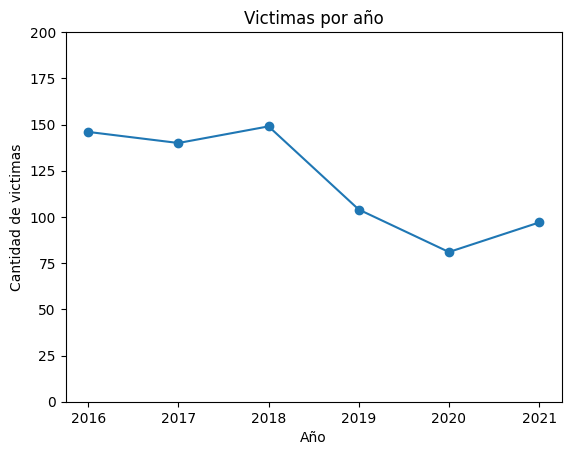

In [75]:
#Cantidad de VICTIMAS POR AÑO
print("Cantidad de victimas por año:")
print(hechos.groupby(['AAAA']).agg({'N_VICTIMAS':'sum'}))

victimas_anual=hechos.groupby(['AAAA']).agg({'N_VICTIMAS':'sum'})
victimas_anual = victimas_anual.reset_index()
x=victimas_anual.AAAA
y=victimas_anual.N_VICTIMAS

plt.plot(x, y,marker='o', linestyle='-')
plt.title('Victimas por año')
plt.xlabel('Año')
plt.ylabel('Cantidad de victimas')
plt.ylim(0, 200)
plt.show()

#Tiene sentido que en el año 2020 hubo menos victimas dado que fue la pandemia y hubo menos movimiento

In [14]:
#VICTIMAS PROMEDIO POR ACCIDENTE
print(F"Victimas promedio por accidente: {round(hechos.N_VICTIMAS.mean(),2)}")

#VICTIMAS PROMEDIO POR AÑO
print("Cantidad de victimas promedio por año:")
print(hechos.groupby(['AAAA']).agg({'N_VICTIMAS':'mean'}))

Victimas promedio por accidente: 1.03
Cantidad de victimas promedio por año:
      N_VICTIMAS
AAAA            
2016    1.013889
2017    1.068702
2018    1.041958
2019    1.009709
2020    1.038462
2021    1.000000


In [15]:
#Evaluo la cantidad de accidentes por franja horaria: HH
hechos.groupby(['HH']).agg({'ID':'count'})

,ID
HH,
0,23
1,24
10,31
11,27
12,32
13,17
14,33
15,25
16,30


In [16]:
#LIMPIEZA GENERAL DATASET "victimas"

#Elimino las columnas repetidas en ambos datasets: fecha, AAAA, MM, DD, Y VICTIMA
victimas.drop(columns=['FECHA','AAAA','MM','DD','VICTIMA'], inplace=True)
victimas.head(5)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19,1/1/2016
1,2016-0002,CONDUCTOR,MASCULINO,70,1/2/2016
2,2016-0003,CONDUCTOR,MASCULINO,30,1/3/2016
3,2016-0004,CONDUCTOR,MASCULINO,18,SD
4,2016-0005,CONDUCTOR,MASCULINO,29,2/1/2016


In [17]:
#Convierto la edad a tipo de dato numerico
victimas['EDAD']= pd.to_numeric(victimas['EDAD'], errors='coerce')

In [18]:
#Paso las fechas al formato correspondiente para poder trabajar luego con ellas
victimas['FECHA_FALLECIMIENTO'] = pd.to_datetime(victimas['FECHA_FALLECIMIENTO'],errors='coerce')
victimas['FECHA_FALLECIMIENTO'].head(5)
victimas.head(3)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03


In [19]:
#Me fijo lo que representa sobre el total de los datos (CALCULAR PORCENTAJES)
porcentaje_nulos = (victimas.isna().sum() / len(victimas)) * 100
print(porcentaje_nulos.round(2))

#El 7% de los datos no tienen la información de la edad
#El 10% se los datos no tiene la fecha de fallecimiento -> voy a asumir que son sobrevivientes

ID_hecho               0.00
ROL                    0.00
SEXO                   0.00
EDAD                   7.39
FECHA_FALLECIMIENTO    9.62
dtype: float64


In [20]:
#Veo las información estadística de las métricas
victimas.describe()

,EDAD,FECHA_FALLECIMIENTO
count,664.000000,648
mean,42.167169,2018-11-23 10:55:33.333333248
min,1.000000,2016-01-01 00:00:00
25%,27.000000,2017-07-26 12:00:00
50%,37.000000,2018-09-21 00:00:00
75%,56.250000,2020-03-06 00:00:00
max,95.000000,2022-01-03 00:00:00
std,19.788034,NaN


In [21]:
#Voy a contar la cantidad total de victimas
#Cuando no encuentre fecha de fallecimiento, asumo que la victima sobrevivió
victimas_totales = victimas.shape[0]
print(f"Cantidad de victimas totales: {victimas_totales}")
victimas_sobrevivientes =victimas['FECHA_FALLECIMIENTO'].isna().sum()  
print(f"Cantidad de victimas que sobrevivieron: {victimas_sobrevivientes}")
print(f"Porcentaje de víctimas fallecidas {(victimas_sobrevivientes/victimas_totales).round(3)*100}%")
victimas_fallecidas= 1-(victimas_sobrevivientes/victimas_totales)
print(f"Porcentaje de víctimas fallecidas {victimas_fallecidas.round(3)*100}%")

Cantidad de victimas totales: 717
Cantidad de victimas que sobrevivieron: 69
Porcentaje de víctimas fallecidas 9.6%
Porcentaje de víctimas fallecidas 90.4%


In [22]:
#Igualo el nombre de la columna ID en cada caso, que hace referencia al ID del hecho
hechos.rename(columns={'ID': 'ID_hecho'}, inplace=True)

hechos.head(5)
victimas.head(5)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03
3,2016-0004,CONDUCTOR,MASCULINO,18.0,NaT
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01


In [23]:
#CONSOLIDO LA INFORMACIÓN DE AMBOS DATASETS
datos_concat = pd.merge(victimas, hechos, on='ID_hecho', how='inner')

In [24]:
datos_concat = datos_concat.reset_index(drop=True)
datos_concat.head(5)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA,AAAA,MM,DD,...,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01,1,2016-01-01,2016,1,1,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02,1,2016-01-02,2016,1,2,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03,1,2016-01-03,2016,1,3,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO
3,2016-0004,CONDUCTOR,MASCULINO,18.0,NaT,1,2016-01-10,2016,1,10,...,LARRAZABAL AV.,"VILLEGAS, CONRADO, GRAL.","LARRAZABAL AV. y VILLEGAS, CONRADO, GRAL.",8,Point (99840.65224780 94269.16534422),-58.465039,-34.680930,MOTO-SD,MOTO,SD
4,2016-0005,CONDUCTOR,MASCULINO,29.0,2016-02-01,1,2016-01-21,2016,1,21,...,SAN JUAN AV.,"SAENZ PE?A, LUIS, PRES.","SAN JUAN AV. y SAENZ PEÃ‘A, LUIS, PRES.",1,Point (106980.32827929 100752.16915795),-58.387183,-34.622466,MOTO-PASAJEROS,MOTO,PASAJEROS


In [25]:
datos_concat.head(5)
datos_concat.to_csv("siniestros_final.csv",index=False)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data=pd.read_csv('siniestros_final.csv')
data.head(3)

,ID_hecho,ROL,SEXO,EDAD,FECHA_FALLECIMIENTO,N_VICTIMAS,FECHA,AAAA,MM,DD,...,Calle,Cruce,Dirección Normalizada,COMUNA,XY (CABA),pos x,pos y,PARTICIPANTES,VICTIMA,ACUSADO
0,2016-0001,CONDUCTOR,MASCULINO,19.0,2016-01-01,1,2016-01-01,2016,1,1,...,PIEDRA BUENA AV.,"FERNANDEZ DE LA CRUZ, F., GRAL. AV.","PIEDRA BUENA AV. y FERNANDEZ DE LA CRUZ, F., G...",8,Point (98896.78238426 93532.43437792),-58.475340,-34.687570,MOTO-AUTO,MOTO,AUTO
1,2016-0002,CONDUCTOR,MASCULINO,70.0,2016-01-02,1,2016-01-02,2016,1,2,...,"PAZ, GRAL. AV.",DE LOS CORRALES AV.,"PAZ, GRAL. AV. y DE LOS CORRALES AV.",9,Point (95832.05571093 95505.41641999),-58.508775,-34.669777,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,CONDUCTOR,MASCULINO,30.0,2016-01-03,1,2016-01-03,2016,1,3,...,ENTRE RIOS AV.,NaN,ENTRE RIOS AV. 2034,1,Point (106684.29090040 99706.57687843),-58.390403,-34.631894,MOTO-AUTO,MOTO,AUTO


In [27]:
print(data.dtypes)

ID_hecho                  object
ROL                       object
SEXO                      object
EDAD                     float64
FECHA_FALLECIMIENTO       object
N_VICTIMAS                 int64
FECHA                     object
AAAA                       int64
MM                         int64
DD                         int64
HORA                      object
HH                        object
LUGAR_DEL_HECHO           object
TIPO_DE_CALLE             object
Calle                     object
Cruce                     object
Dirección Normalizada     object
COMUNA                     int64
XY (CABA)                 object
pos x                    float64
pos y                    float64
PARTICIPANTES             object
VICTIMA                   object
ACUSADO                   object
dtype: object


In [28]:
datos_numericos = data.select_dtypes(include=[np.number])
datos_numericos.dtypes

EDAD          float64
N_VICTIMAS      int64
AAAA            int64
MM              int64
DD              int64
COMUNA          int64
pos x         float64
pos y         float64
dtype: object

In [29]:
#Observo la edad promedio de las victimas:
print(f"Edad promedio de las victimas: {int(datos_numericos.EDAD.mean())}")
#Observo la desviacion estandar de la EDAD:
print(f"Desviacion estandar de Edad: {round(datos_numericos.EDAD.std(),1)}")
#Como la desviacion estandar es grande, vamos a ver la variacion en las edades:
print(f"Edad de la victima más jóven: {int(datos_numericos.EDAD.min())}")
print(f"Edad de la victima más grande: {int(datos_numericos.EDAD.max())}")

Edad promedio de las victimas: 42
Desviacion estandar de Edad: 19.8
Edad de la victima más jóven: 1
Edad de la victima más grande: 95


In [30]:
#Observo el promedio de las victimas:
print(f"Numeros de victimas promedio: {round(datos_numericos.N_VICTIMAS.mean(),2)}")

#Observo la desviacion estandar del numero de victimas:
print(f"Desviacion estandar de  victimas: {round(datos_numericos.N_VICTIMAS.std(),2)}")

Numeros de victimas promedio: 1.06
Desviacion estandar de  victimas: 0.26


In [31]:
#Evaluo correlaciones entre diferentes variables 
pearson_corr = datos_numericos.corr(method='pearson')
print(pearson_corr)

                EDAD  N_VICTIMAS      AAAA        MM        DD    COMUNA  \
EDAD        1.000000   -0.091452  0.093021  0.022526  0.008836 -0.056974   
N_VICTIMAS -0.091452    1.000000 -0.070402 -0.018718  0.023851 -0.006149   
AAAA        0.093021   -0.070402  1.000000 -0.039499 -0.041482  0.017353   
MM          0.022526   -0.018718 -0.039499  1.000000 -0.025913  0.058184   
DD          0.008836    0.023851 -0.041482 -0.025913  1.000000 -0.000123   
COMUNA     -0.056974   -0.006149  0.017353  0.058184 -0.000123  1.000000   
pos x       0.057498    0.000312  0.012594 -0.080419 -0.029651 -0.683747   
pos y       0.067812   -0.012061  0.060793 -0.000157 -0.035486  0.337389   

               pos x     pos y  
EDAD        0.057498  0.067812  
N_VICTIMAS  0.000312 -0.012061  
AAAA        0.012594  0.060793  
MM         -0.080419 -0.000157  
DD         -0.029651 -0.035486  
COMUNA     -0.683747  0.337389  
pos x       1.000000  0.072254  
pos y       0.072254  1.000000  


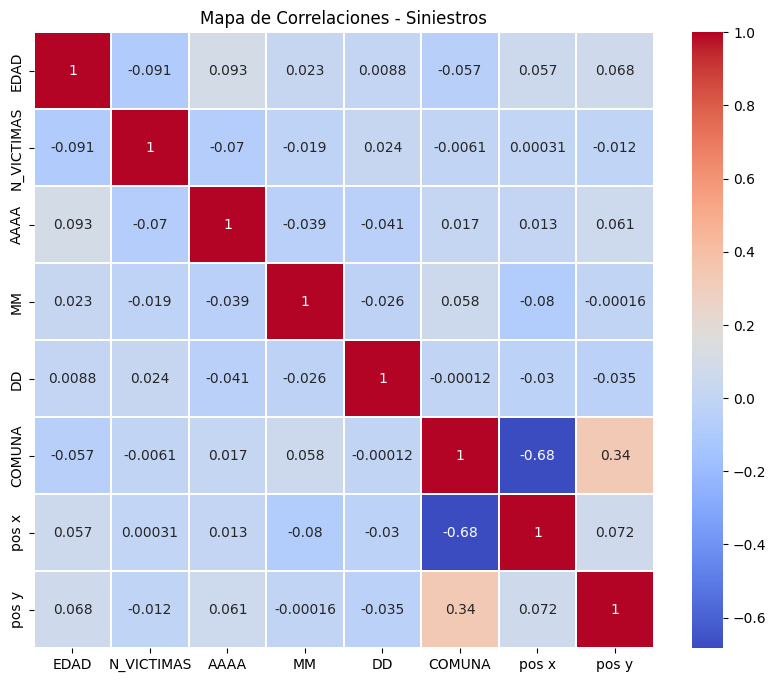

In [32]:
#Visualizacion mejor con mapa de correlación
matriz_corr = datos_numericos.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(matriz_corr, annot=True, cmap='coolwarm', linewidths=0.3)
plt.title('Mapa de Correlaciones - Siniestros')
plt.show()

#No parece haber correlación fuerte entre las diferentes variables consideradas
#En todos los casos la correlacion es debil


In [33]:
#Me fijo el porcentaje de nulos representa sobre el total de los datos
porcentaje_nulos = (data.isna().sum() / len(data)) * 100
print(porcentaje_nulos.round(2))

#Falta información del cruce en el 25% de los datos

ID_hecho                  0.00
ROL                       0.00
SEXO                      0.00
EDAD                      7.39
FECHA_FALLECIMIENTO       9.62
N_VICTIMAS                0.00
FECHA                     0.00
AAAA                      0.00
MM                        0.00
DD                        0.00
HORA                      0.14
HH                        0.00
LUGAR_DEL_HECHO           0.00
TIPO_DE_CALLE             0.00
Calle                     0.14
Cruce                    24.69
Dirección Normalizada     1.26
COMUNA                    0.00
XY (CABA)                 0.00
pos x                     1.81
pos y                     1.81
PARTICIPANTES             0.00
VICTIMA                   0.00
ACUSADO                   0.00
dtype: float64


Text(0.5, 1.0, 'Número de Víctimas en Siniestros Viales')

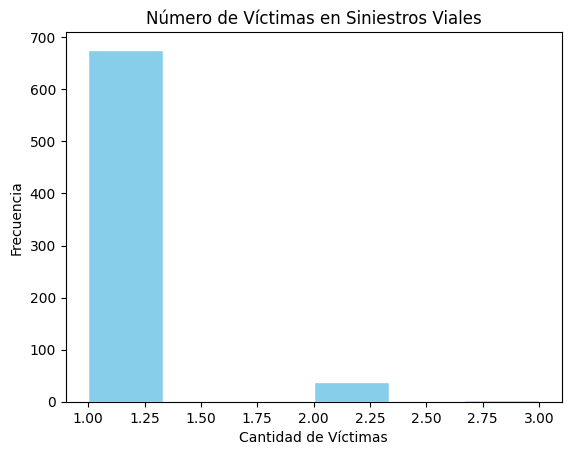

In [34]:
#Histograma
#Voy a ver la frecuenta del numero de victimas 

numero_victimas = data['N_VICTIMAS']
plt.hist(numero_victimas, bins=6, color='skyblue', edgecolor='white') # Elige el número de bins apropiado
plt.xlabel('Cantidad de Víctimas')
plt.ylabel('Frecuencia')
plt.title('Número de Víctimas en Siniestros Viales')
#Practicamente hay 1 victima por accidente


Text(0.5, 1.0, 'Edad de Víctimas en Siniestros Viales')

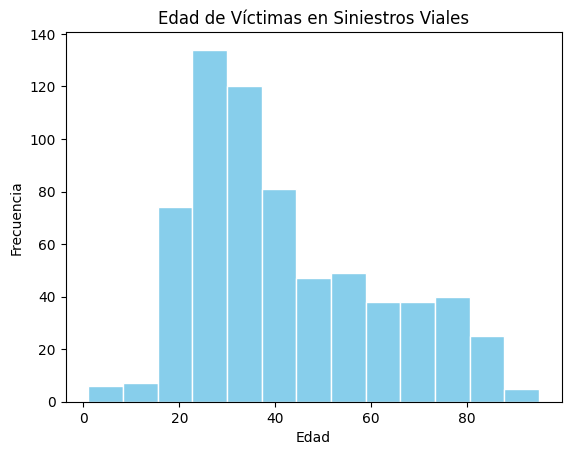

In [35]:
#Histograma
#Voy a ver la frecuencia de edad de las victimas 
numero_victimas = data['EDAD']
plt.hist(numero_victimas, bins=13, color='skyblue', edgecolor='white') # Elige el número de bins apropiado
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.title('Edad de Víctimas en Siniestros Viales')

#La mayoría de las victimas tienen entre 20 y 30 años

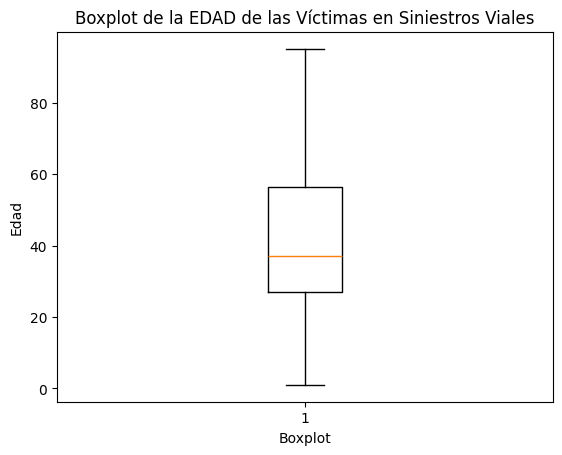

EDAD PROMEDIO o la MEDIA de las victimas es: 42
MIN EDAD de las victimas: 1
MAX EDAD de las victimas: 95
MEDIANA de la edad de las victimas es: 37 ( o Cuartil 2)
MODA: edad que mas se repite en las victimas: 30
Primer cuartil: 27 
Tercer cuartil: 56 
Rango intercuartilico: 29.25 
Bigote inferior: -16.875 
Bigote superior: 100 


/var/folders/lh/p6j3glj52sq44ch3v_6_hltc0000gn/T/ipykernel_28333/3947293754.py:24: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  moda=int(data_sin_nulos['EDAD'].mode())


In [36]:
#BOXPLOT
#Voy a hacer el grafico de cajas con la edad
#Elimino los nulos para poder realizarlo sin problemas
data_sin_nulos= data.dropna(subset=['EDAD'])
data_sin_nulos['EDAD']

plt.boxplot(data_sin_nulos['EDAD'])
plt.xlabel('Boxplot')
plt.ylabel('Edad')
plt.title('Boxplot de la EDAD de las Víctimas en Siniestros Viales')
plt.show()

#La caja representa la variabilidad del conjunto de los datos 
#La amplitud de la caja representa el rango intercuartil

#Calculo la edad promedio
promedio=np.mean(data_sin_nulos['EDAD'])
#Calculo el minimo
minimo=data_sin_nulos['EDAD'].min()
#Calculo el minimo
maximo=data_sin_nulos['EDAD'].max()
#Calculo la mediana: valor que divide el conjunto de datos en dos partes iguales
mediana = data_sin_nulos['EDAD'].median()
moda=int(data_sin_nulos['EDAD'].mode())
q1 = data_sin_nulos['EDAD'].quantile(0.25)
q3 = data_sin_nulos['EDAD'].quantile(0.75)
iqr = q3 - q1
bigote_inferior = data_sin_nulos['EDAD'].quantile(0.25) - 1.5 * iqr
bigote_superior= data_sin_nulos['EDAD'].quantile(0.75) + 1.5 * iqr

print(f"EDAD PROMEDIO o la MEDIA de las victimas es: {int(promedio)}")
print(f"MIN EDAD de las victimas: {int(minimo)}")
print(f"MAX EDAD de las victimas: {int(maximo)}")
print(f"MEDIANA de la edad de las victimas es: {int(mediana)} ( o Cuartil 2)")
print(f"MODA: edad que mas se repite en las victimas: {int(moda)}")
print(f"Primer cuartil: {int(q1)} ")
print(f"Tercer cuartil: {int(q3)} ")
print(f"Rango intercuartilico: {iqr} ")
print(f"Bigote inferior: {bigote_inferior} ") 
print(f"Bigote superior: {int(bigote_superior)} ")
#Todas las edades estan entre el bigote inferior y el superior. No hay outliers.

Text(0.5, 1.0, 'Sexo de las Víctimas en Siniestros Viales')

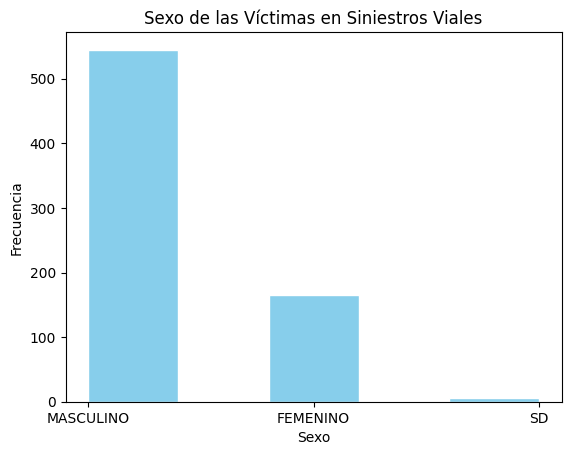

In [37]:
#Histograma
#Voy a ver el sexo de las victimas 
numero_victimas = data['SEXO']
plt.hist(numero_victimas, bins=5, color='skyblue', edgecolor='white')
plt.xlabel('Sexo')
plt.ylabel('Frecuencia')
plt.title('Sexo de las Víctimas en Siniestros Viales')

#La mayoria de las victimas son de sexo masculino
